## CS345 Fall 2022 Assignment 3


### Preliminaries

Datasets:

* The [QSAR](http://archive.ics.uci.edu/ml/datasets/QSAR+biodegradation) data for predicting the biochemical activity of a molecule.
* The [Wisconsin breast cancer wisconsin dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer).
  

## Part 1:  choosing optimal hyperparameters

Just about any machine learning algorithm has some **hyperparameters**.  These are parameters that are set by the user and are not determined as part of the training process.
The perceptron for example, has two of those - the number of epochs and the learning rate.  For the k-nearest neighbor classifier (kNN) it's the number of neighbors, $k$, and for the linear SVM it's the soft margin constant, $C$.  Our objective in machine learning is to obtain classifiers with high accuracy, and have good estimates of how well they are performing.  In other words, we need to know how accurate a classifier would be on unseen data.  This is why we use separate test sets that the classifier has not seen for evaluating accuracy.

When working with classifiers with hyperparameters you may be tempted to apply the following procedure:

* Randomly split the data into separate train and test sets.
* Loop over a list of candidate values for the hyperparameter.
* For each value, train the classifier over the training set and evaluate its performance on the test set.
* Choose the parameter value that maximizes the accuracy over the test set, and report the accuracy that you obtained.

However, it turns out that this procedure is flawed, and the resulting accuracy estimate can be overly optimistic.  This is because the choice of the best performing parameter value used information about the test set: by selecting the best value we used information about the labels of the test set.  Therefore, the resulting accuracy estimate uses the labels of the test set, invalidating this accuracy estimate as being totally without any knowledge of the test set.

Here is a better approach.  Rather than splitting the data into train and test sets, we will now split the data into three sets:  **train, validation, and test**.  The validation set will be used for evaluation of different values of the hyperparameter, leading to the following approach:

* Randomly split the data into separate train, validation, and test sets (say with ratios of 0.5, 0.2, 0.3).
* Loop over a list of candidate values for the hyperparameter.
* For each value, train the classifier over the **training set** and evaluate its performance on the **validation set**. 
* Choose the best classifier, and report its accuracy over the **test set**.

Your task is as follows:

* Use the method described above to evaluate the performance of the kNN classifier over the QSAR and Wisconsin breast cancer dataset.  Use a wide range of $k$ values.  Repeat the process ten times over different train/test splits and report the average accuracy over the test set.  What value of $k$ was chosen?  Note that the optimal value of $k$ may vary for different splits.  Comment on your results.

* Perform the same experiment for the linear SVM. In this case the soft-margin constant $C$ is the hyperparameter that requires an informed choice.  Use a wide range of values for $C$, as we have done in class.  Comment on your results.

You may use the scikit-learn kNN and SVM implementations and `train_test_split`.

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [ ]:
#@title k-nearest negithbor(knn)
# k-nearest negithbor(knn)
from matplotlib.colors import ListedColormap

def plot_boundary(classifier, X, y) :
    """
    plot the decision boundary of a classifier
    
    code based on:
    https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
    """
    classifier.fit(X, y)
    # color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    # create a two dimensional grid of points
    h = .02  # grid size
    x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
    y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

    # plot the predictions on the grid
    Z = Z.reshape(xx.shape)
    
    ax = plt.subplot(111)

    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # plot the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, alpha=0.5)
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)    

In [ ]:
#@title Perceptron
# Perceptron
class perceptron :
    """An implementation of the perceptron algorithm.
    Note that this implementation does not include a bias term"""
 
    def __init__(self, iterations=100, learning_rate=0.2, 
                 plot_data=False, random_w=False, seed=42) :
        self.iterations = iterations
        self.learning_rate = learning_rate
        self.plot_data = plot_data
        self.random_w = random_w
        self.seed = seed
  
    def fit(self, X, y) :
        """
        Train a classifier using the perceptron training algorithm.
        After training the attribute 'w' will contain the perceptron weight vector.
 
        Parameters
        ----------
 
        X : ndarray, shape (num_examples, n_features)
        Training data.
 
        y : ndarray, shape (n_examples,)
        Array of labels.
 
        """
        
        if self.random_w :
            rng = np.random.default_rng(self.seed)
            self.w = rng.uniform(-1 , 1, len(X[0]))
            # print("initialized with random weight vector")
        else :
            self.w = np.zeros(len(X[0]))
            # print("initialized with a zeros weight vector")
        self.wold = self.w
        converged = False
        iteration = 0
        while (not converged and iteration <= self.iterations) :
            converged = True
            for i in range(len(X)) :
                if y[i] * self.decision_function(X[i]) <= 0 :
                    self.wold = self.w
                    self.w = self.w + y[i] * self.learning_rate * X[i]
                    converged = False
                    if self.plot_data:
                        self.plot_update(X, y, i)
            iteration += 1
        self.converged = converged
        if converged :
            print ('converged in %d iterations ' % iteration)
 
    def decision_function(self, x) :
        return np.dot(x, self.w)
 
    def predict(self, X) :
        """
        make predictions using a trained linear classifier
 
        Parameters
        ----------
 
        X : ndarray, shape (num_examples, n_features)
        Training data.
        """
 
        scores = np.dot(X, self.w)
        return np.sign(scores)
    
    def plot_update(self, X, y, ipt) :
        fig = plt.figure(figsize=(4,4))
        plt.xlim(-1,1)
        plt.ylim(-1,1)
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.arrow(0,0,self.w[0],self.w[1], 
                  width=0.001,head_width=0.05, 
                  length_includes_head=True, alpha=1,
                  linestyle='-',color='darkred')
        plt.arrow(0,0,self.wold[0],self.wold[1], 
                  width=0.001,head_width=0.05, 
                  length_includes_head=True, alpha=1,
                  linestyle='-',color='orange')
        anew = -self.w[0]/self.w[1]
        aold = -self.wold[0]/self.wold[1]
        pts = np.linspace(-1,1)
        plt.plot(pts, anew*pts, color='darkred')
        plt.plot(pts, aold*pts, color='orange')
        plt.title("in orange:  old w; in red:  new w")
        cols = {1: 'g', -1: 'b'}
        for i in range(len(X)): 
            plt.plot(X[i][0], X[i][1], cols[y[i]]+'o', alpha=0.6,markersize=5) 
        plt.plot(X[ipt][0], X[ipt][1], 'ro', alpha=0.2,markersize=20)

In [ ]:
#@title Import QSAR and breast cancer dataset
# import QSAR dataset
QSAR_data = pd.read_csv('biodeg.csv',sep =";", header = None)
X_QSAR = QSAR_data.values[:,:-1]
y1 = QSAR_data.values[:,-1]
unique_label = np.unique(QSAR_data.values[:,-1])
y_QSAR = np.array([np.where(i== unique_label)[0][0]for i in y1])
y_QSAR = y_QSAR*2 -1
# print (X_QSAR.shape, y_QSAR.shape)
# print (y_QSAR)


# import breast cancer dataset
from sklearn.datasets import load_breast_cancer
breast_data = load_breast_cancer()
X_breast = breast_data.data
y_breast = breast_data.target
y_breast = y_breast * 2 - 1
# print (X_breast.shape, y_breast.shape)

# Randomly split the data into separate train and test sets.
# print("QSAR----------split the data into three sets")

X_train_QSAR, X_rem_QSAR, y_train_QSAR, y_rem_QSAR = train_test_split(X_QSAR, y_QSAR, 
    test_size=0.5, shuffle=True, random_state=42)
X_valid_QSAR, X_test_QSAR, y_valid_QSAR, y_test_QSAR = train_test_split(X_rem_QSAR, y_rem_QSAR, 
    test_size=0.3, shuffle=True, random_state=42)

# print(X_train_QSAR.shape,y_train_QSAR.shape, X_valid_QSAR.shape,y_valid_QSAR.shape, X_test_QSAR.shape,y_test_QSAR.shape)

# print("breast----------split the data into three sets")
X_train_breast, X_rem_breast, y_train_breast, y_rem_breast = train_test_split(X_breast, y_breast, 
    test_size=0.5, shuffle=True, random_state=42)
X_valid_breast, X_test_breast, y_valid_breast, y_test_breast = train_test_split(X_rem_breast, y_rem_breast, 
    test_size=0.3, shuffle=True, random_state=42)

# print(X_train_breast.shape,y_train_breast.shape, X_valid_breast.shape,y_valid_breast.shape, X_test_breast.shape,y_test_breast.shape)

In [ ]:
#@title Define perc_epochs function
def perc_epochs (X_train, X_valid, y_train, y_valid, num_epochs,learning_rate):
  acc=[]
  prev_acc=0
  for n1 in range(len(num_epochs)):
    n=num_epochs[n1]
    for l1 in range(len(learning_rate)):
      l=learning_rates[l1]
      p1 = perceptron(iterations = n, learning_rate = l)                      
      p1.fit(X_train,y_train)
      y_pred = p1.predict(X_valid)
      accuracy = np.mean(y_valid == y_pred)
      acc.append(accuracy)
      if accuracy>prev_acc:
        lr_index=l1
        epoch_index=n1
        prev_acc=accuracy

    print(f"num epochs: {n}\t accuracy: {accuracy:0.3f}")
    # print(np.argmax(acc))
  return num_epochs[epoch_index], learning_rates[lr_index]



In [ ]:
num_epochs = [2, 5, 10, 20, 40, 100,200, 500, 1000]
learning_rates = [0.00001, 0.001, 0.01, 0.1, 12, 5, 10]

perc_epochs_QSAR,lr_QSAR = perc_epochs (X_train_QSAR, X_valid_QSAR, y_train_QSAR, y_valid_QSAR, num_epochs,learning_rates)
perc_epochs_breast,lr_breast = perc_epochs (X_train_breast, X_valid_breast, y_train_breast, y_valid_breast, num_epochs,learning_rates)

p = perceptron(iterations = perc_epochs_QSAR, learning_rate = lr_QSAR)
p1 = perceptron(iterations = perc_epochs_breast, learning_rate = lr_breast)

p.fit(X_train_QSAR,y_train_QSAR)
p1.fit(X_train_breast,y_train_breast)

y_pred_QSAR = p.predict(X_test_QSAR)
y_pred_breast = p1.predict(X_test_breast)

print(f'accuracy on QSAR test set:  {np.mean(y_test_QSAR == y_pred_QSAR):0.3f}')
print(f'accuracy on Breast test set:  {np.mean(y_test_breast == y_pred_breast):0.3f}')

num epochs: 2	 accuracy: 0.488
num epochs: 5	 accuracy: 0.724
num epochs: 10	 accuracy: 0.705
num epochs: 20	 accuracy: 0.715
num epochs: 40	 accuracy: 0.816
num epochs: 100	 accuracy: 0.721
num epochs: 200	 accuracy: 0.699
num epochs: 500	 accuracy: 0.829
num epochs: 1000	 accuracy: 0.805
num epochs: 2	 accuracy: 0.945
num epochs: 5	 accuracy: 0.653
num epochs: 10	 accuracy: 0.688
num epochs: 20	 accuracy: 0.714
num epochs: 40	 accuracy: 0.930
num epochs: 100	 accuracy: 0.844
num epochs: 200	 accuracy: 0.915
num epochs: 500	 accuracy: 0.910
num epochs: 1000	 accuracy: 0.915
accuracy on QSAR test set:  0.792
accuracy on Breast test set:  0.907


In [ ]:

def svm_knn(X_train, X_valid, y_train, y_valid,num_neighbors,constant):
  valid_accuracy = []
  training_accuracy = []
  for k in num_neighbors:
    for c in constant:
      classifier = KNeighborsClassifier(n_neighbors=k, p=c, weights='uniform')
      classifier.fit(X_train, y_train)
      y_pred = classifier.predict(X_valid)   
      valid_acc = np.sum(y_pred == y_valid)/len(y_valid)
      valid_accuracy.append(valid_acc)
      y_pred = classifier.predict(X_train)
      traing_acc = np.sum(y_pred == y_train)/len(y_train)
      training_accuracy.append(traing_acc)
    print(f"num neighbors: {k}\t valid accuracy: {valid_acc:0.3f}")
    print(f"num neighbors: {k}\t train accuracy: { traing_acc:0.3f}")
  return num_neighbors[np.argmax(valid_accuracy)], num_neighbors[np.argmax(training_accuracy)]

In [ ]:
num_neighbors = [1,3,5,10,15,20,25,30]
constant = [1,2,3,4,5,6,7]

svm_QSAR, c_QSAR = svm_knn(X_train_QSAR, X_valid_QSAR, y_train_QSAR, y_valid_QSAR, num_neighbors,constant)
classifier= KNeighborsClassifier(n_neighbors = svm_QSAR, weights= 'uniform', p=c_QSAR)
classifier.fit(X_train_QSAR,y_train_QSAR)

y_test_pred_QSAR = classifier.predict (X_test_QSAR)
print(f'accuracy on QSAR test set:  {np.mean(y_test_QSAR == y_test_pred_QSAR):0.3f}')

# svm_breast, c_breast = svm_knn(X_train_breast, X_valid_breast, y_train_breast, y_valid_breast, num_neighbors,constant)
# classifier1= KNeighborsClassifier(n_neighbors = svm_breast, weights= 'uniform', p=c_breast)
# y_test_pred_breast = classifier1.predict (X_test_breast)
# print(f'accuracy on Breast cancer test set:  {np.mean(y_test_breast == y_test_pred_breast):0.3f}')


num neighbors: 1	 valid accuracy: 0.753
num neighbors: 1	 train accuracy: 1.000
num neighbors: 3	 valid accuracy: 0.753
num neighbors: 3	 train accuracy: 0.873
num neighbors: 5	 valid accuracy: 0.743
num neighbors: 5	 train accuracy: 0.835
num neighbors: 10	 valid accuracy: 0.753
num neighbors: 10	 train accuracy: 0.810
num neighbors: 15	 valid accuracy: 0.756
num neighbors: 15	 train accuracy: 0.795
num neighbors: 20	 valid accuracy: 0.729
num neighbors: 20	 train accuracy: 0.784
num neighbors: 25	 valid accuracy: 0.724
num neighbors: 25	 train accuracy: 0.746
num neighbors: 30	 valid accuracy: 0.705
num neighbors: 30	 train accuracy: 0.736
accuracy on QSAR test set:  0.811


In [ ]:
num_neighbors1 = [1,3,5,10,15,20,25,30]
constant1 = [1,2,3]
svm_breast, c_breast = svm_knn(X_train_breast, X_valid_breast, y_train_breast, y_valid_breast, num_neighbors1,constant1)
classifier1= KNeighborsClassifier(n_neighbors = svm_breast, weights= 'uniform', p=c_breast)
classifier1.fit(X_train_breast,y_train_breast)
y_test_pred_breast = classifier1.predict(X_test_breast)
print(f'accuracy on Breast cancer test set:  {np.mean(y_test_breast == y_test_pred_breast):0.3f}')


num neighbors: 1	 valid accuracy: 0.935
num neighbors: 1	 train accuracy: 1.000
num neighbors: 3	 valid accuracy: 0.945
num neighbors: 3	 train accuracy: 0.944
num neighbors: 5	 valid accuracy: 0.965
num neighbors: 5	 train accuracy: 0.923
num neighbors: 10	 valid accuracy: 0.965
num neighbors: 10	 train accuracy: 0.919
num neighbors: 15	 valid accuracy: 0.960
num neighbors: 15	 train accuracy: 0.905
num neighbors: 20	 valid accuracy: 0.955
num neighbors: 20	 train accuracy: 0.901
num neighbors: 25	 valid accuracy: 0.935
num neighbors: 25	 train accuracy: 0.894
num neighbors: 30	 valid accuracy: 0.940
num neighbors: 30	 train accuracy: 0.901
accuracy on Breast cancer test set:  0.930


In [ ]:
print(svm_QSAR,c_QSAR)
print(svm_breast, c_breast)
# K=30,  C =1

30 1
25 1


**and space for discussing your results**

## Part 2:  PCA for removing noise from data

As we have seen in class, performance of the nearest neighbor classifer degrades when the data has noisy features that are not relevant to the classification problem.  To remedy this problem, we will use PCA to reduce the dimensionality of the data.

Here is your task:

* Use the QSAR dataset and evaluate performance of K nearest neighbors and SVM.  For simplicity, choose the values of K and $C$ that you selected in part 1.  Add 2000 noise features and evaluate model performance after doing so.
* Next, use PCA to represent the data in the space of a given number of principal components.  Evaluate the performance of the KNN and SVM classifiers as you vary the number of principal components (no need to go above the original dimensionality of the dataset when doing so).  Plot the accuracy of each classifier as you vary the number of components.
* Discuss your results:  was PCA useful for improving classifier performance?  Which of the two classifiers appears to be more robust to noise?
* In class your instructer noted that the data needs to be centered or standardized before applying PCA.  Do you observe a difference in classifier performance when you center or standardize the data before applying PCA?  (Recall that centering refers to subtracting the mean from each feature, making it so that each feature has a mean of 0).


In [ ]:
#@title Default title text
# import QSAR dataset
QSAR_data = pd.read_csv('biodeg.csv',sep =";", header = None)
X_QSAR = QSAR_data.values[:,:-1]
y1 = QSAR_data.values[:,-1]
unique_label = np.unique(QSAR_data.values[:,-1])
y_QSAR = np.array([np.where(i== unique_label)[0][0]for i in y1])
y_QSAR = y_QSAR*2 -1
print (X_QSAR.shape, y_QSAR.shape)
print (y_QSAR)

# Randomly split the data into separate train and test sets.
print("QSAR----------split the data into three sets")

X_train_QSAR, X_rem_QSAR, y_train_QSAR, y_rem_QSAR = train_test_split(X_QSAR, y_QSAR, 
    test_size=0.5, shuffle=True, random_state=42)
X_valid_QSAR, X_test_QSAR, y_valid_QSAR, y_test_QSAR = train_test_split(X_rem_QSAR, y_rem_QSAR, 
    test_size=0.3, shuffle=True, random_state=42)

print(X_train_QSAR.shape,y_train_QSAR.shape, X_valid_QSAR.shape,y_valid_QSAR.shape, X_test_QSAR.shape,y_test_QSAR.shape)

(1055, 41) (1055,)
[ 1  1  1 ... -1 -1 -1]
QSAR----------split the data into three sets
(527, 41) (527,) (369, 41) (369,) (159, 41) (159,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from numpy.random import default_rng
rng = default_rng(1)
rng.normal(0, 0.5, size=(2,3))
# -----------------knn------------------

X_QSAR,y_QSAR = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1, class_sep=0.35, random_state=1)
X_QSAR_train,X_QSAR_test,y_QSAR_train,y_QSAR_test = train_test_split(X_QSAR, y_QSAR, test_size=0.3, shuffle=True, random_state=1)
# print(X_QSAR_train.shape,X_QSAR_test.shape,y_QSAR_train.shape,y_QSAR_test.shape)
knn = KNeighborsClassifier(n_neighbors = svm_QSAR)
knn.fit(X_QSAR_train,y_QSAR_train)
# print(X_QSAR_train,X_QSAR_test,y_QSAR_train,y_QSAR_test)
y_pred_test = knn.predict(X_QSAR_test)
y_pred_train = knn.predict(X_QSAR_train)
print("accurcy by knn without noise",np.sum(y_pred_test == y_QSAR_test)/len(y_QSAR_test))
# print("accurcy training set without noise",np.sum(y_pred_train == y_QSAR_train)/len(y_QSAR_train))

num_noise = 2000

X_train_noise = np.hstack((X_QSAR_train,rng.normal(0, 0.5, size=(len(X_QSAR_train),num_noise))))
X_test_noise = np.hstack((X_QSAR_test,rng.normal(0, 0.5, size=(len(X_QSAR_test),num_noise)))) 
knn1 = KNeighborsClassifier(n_neighbors = svm_QSAR)
knn1.fit(X_train_noise,y_QSAR_train)
y_pred_test_noise = knn1.predict(X_test_noise)
y_pred_train_noise = knn1.predict(X_train_noise)

print("accurcy by knn with noise",np.sum(y_pred_test_noise == y_QSAR_test)/len(y_QSAR_test))
# print("accurcy training set with noise",np.sum(y_pred_train_noise == y_QSAR_train)/len(y_QSAR_train))



accurcy by knn without noise 0.9
accurcy by knn with noise 0.6


In [ ]:
from sklearn import svm
# -----------------SVM------------------
classifier_svm = svm.SVC(kernel="linear", C = c_QSAR)
classifier_svm.fit(X_QSAR_train,y_QSAR_train)
y_pred_test = classifier_svm.predict(X_QSAR_test)
print('accuracy by svm without noise: ', np.mean(y_QSAR_test == y_pred_test))

classifier_svm1 = svm.SVC(kernel="linear", C = c_QSAR)
classifier_svm1.fit(X_train_noise,y_QSAR_train)
y_pred_test_noise = classifier_svm1.predict(X_test_noise)
print('accuracy by svm with noise: ', np.mean(y_QSAR_test == y_pred_test_noise))



accuracy by svm without noise:  0.9333333333333333
accuracy by svm with noise:  0.5333333333333333


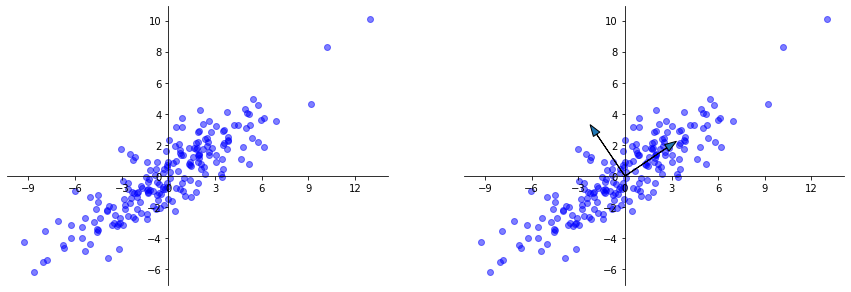

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

from sklearn.datasets import make_blobs
# create data with a single class:
X_train_noise , y_QSAR_train = make_blobs(n_samples=200, n_features=2, centers=[[0.0,0.0]], cluster_std=[[4.0,1.0]], shuffle=True, random_state=2)
X_test_noise , y_QSAR_test = make_blobs(n_samples=200, n_features=2, centers=[[0.0,0.0]], cluster_std=[[4.0,1.0]], shuffle=True, random_state=2)

# Rotate the data
theta = np.radians(35)
rotation = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]])
Xr_train = np.matmul(X_train_noise,rotation.T)
Xr_test  = np.matmul(X_test_noise,rotation.T)

# apply PCA
pca = PCA(2)
pca.fit(Xr_train)
components = pca.components_

pca1 = PCA(2)
pca1.fit(Xr_test)
components = pca1.components_

fig = plt.figure(figsize = (15,15))
ax1 = fig.add_subplot(223)
ax2 = fig.add_subplot(224)
#ax.set_aspect('equal')
ax1.scatter(Xr_train[:,0], Xr_train[:,1], color='b', alpha=0.5)
ax2.scatter(Xr_test[:,0], Xr_test[:,1], color='b', alpha=0.5)
plt.arrow(0,0, components[0][0]*4,components[0][1]*4, 
          head_width=0.5, ec='k', 
          length_includes_head=True)

plt.arrow(0,0, components[1][0]*4,components[1][1]*4, 
          head_width=0.5, ec='k', 
          length_includes_head=True)

from matplotlib.ticker import MaxNLocator
def axes_at_zero(ax):
    """helper to make the axes go through (0,0)"""
    ax.spines['left'].set_position(('data', 0.0))
    ax.spines['bottom'].set_position(('data', 0.0))
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set_aspect('equal')
    
axes_at_zero(ax1)
axes_at_zero(ax2)

In [ ]:
data = {"accuracy with noise":[0.5333333333333333,0.6],
        "accuracy without noise": [0.9333333333333333,0.9]}
df = pd.DataFrame(data, index = ["svm","knn"])
print(df)

     accuracy with noise  accuracy without noise
svm             0.533333                0.933333
knn             0.600000                0.900000


Discuss your results: was PCA useful for improving classifier performance? Which of the two classifiers appears to be more robust to noise?

Since the way of PCA help to reduce the dimensions of the dataset. it helps to find the most important vaiable which describe a dataset. since we add 2000 noise, the performance of adding noise is decrease. however, the pca can remove unnecessary featuyres from the dataset. 



### Your Report

Answer the questions in the cells reserved for that purpose.


### Submission

Submit your report as a Jupyter notebook via Canvas.  Running the notebook should generate all the plots in your notebook.

### Grading 

Although we will not grade on a 100 pt scale, the following is a grading sheet that will help you:


```
Grading sheet for assignment 3

Part 1:  45 points (5 pts for discussion).
Part 2:  55 points (10 pts for discussion).
```

Grading should be based on the following criteria:

  * Code correctness.
  * Plots and other results are well formatted and easy to understand.
  * Interesting and meaningful observations made where requested.
  * Notebook is readable, well-organized, and concise.
  
